# Checking to see if younger soccer players are more expensive to buy.
This is aiming to see wether age has any correlation with price in the transfer market across all leagues 

### All the cleaning was done in clean.ipynb

First, the imports:

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Note for the editor

### Most changes/removals are because we are trying to calculate trends of how parent clubs have assesed the value of their young players, and what buying clubs think is worth paying for. 

1. Loan trasfers are not included because we are simply looking at permananet transfers, by taking a loan, the amount of risk taken by a club is not as significant.

2. Transfers within the club were removed. Transfermarkt also adds players who have been promoted from the academy to the first team as a transfer, the registration change is not enough as a transfer. 

In [3]:
df = pd.read_csv('data.csv')
len(df)
#arrange according to ascending age


61529

In [4]:
df = df.sort_values(by=['fee_cleaned'])
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,Alan Alegre,25.0,Centre-Back,Quilmes Atlético Club,free transfer,in,Summer,0.0,Superliga,2016,2016/2017,Argentina
32432,Sanfrecce Hiroshima,Ryo Nagai,28.0,Centre-Forward,Matsumoto Yamaga,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32433,Sanfrecce Hiroshima,Kazuki Kushibiki,26.0,Centre-Back,Nagoya Grampus,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32446,Sagan Tosu,Ryoya Morishita,22.0,Right-Back,Meiji University,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32447,Sagan Tosu,Yosuke Yuzawa,29.0,Left Winger,Kyoto Sanga,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan


# I want to test if younger players are more expensive than older players

## Null Hypothesis: The fee of a player is not different for young players and old players (H0: Uy = Uo)
## Alternative Hypothesis: the fee of young players is higher than the fee of older players (H1: Uy > Uo)

In [ ]:
%%R -i df -w 800 -h 600
#This is just plotting all the data
ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point()

I thought I should draw a line. 

In [ ]:
%%R

ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)

The line was useless.

In [ ]:
%%R

model <- lm(fee_cleaned ~ age, data=df)

summary(model)

### Analysis

I think that this model shows that players lose around 100K in value for every year they gain. The P values are also quite low. So there is something here. I may need to figure out filter out te data.

The line is not very regressive. I think this will not give me too much, so I should split the dataframe into two sets. I will also remove the outliers because I think that they aren't too important and are freak occurances. 

In [ ]:
#keep only these leagues: Serie A, La Liga, Premier League, 1 Bundesliga, Ligue 1
df = df[df['league_name'].isin(['Serie A', 'La Liga', 'Premier League', '1. Bundesliga', 'Ligue 1'])]



In [ ]:
#Make two new dataframes with players before their peak and after their peak
df_young = df[df['age'] < 25]
df_old = df[df['age'] >= 25]

### 26 is the age at which players peak, so i'm expecting values to spike just before that.

In [ ]:
%%R -i df_young -w 800 -h 600

ggplot(df_young, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)


In [ ]:
%%R

model <- lm(fee_cleaned ~ age, data=df_young)

summary(model)

In [ ]:
%%R -i df_old -w 800 -h 600

ggplot(df_old, aes(x=age, y=fee_cleaned)) +
    geom_point()+ 
    geom_smooth(method='lm', formula= y~x)

## Older players fade into irrelavence

In [ ]:
%%R

model <- lm(fee_cleaned ~ age, data=df_old)

summary(model)

## Everything i did before this was wrong

Hypothesis: Bayern Munich buys players at an age higher than Borussia Dortumund and at a higher price. 

Null Hypothesis: There's no difference in the average age of players signed by both clubs.

Alternative Hypothesis: Dortmund buys players at an older average age

In [ ]:
df.league_name.unique()
df

In [5]:
bayern = pd.read_csv('bayern.csv')
dortmund = pd.read_csv('dortmund.csv')
#conactenate the two dataframes
df = pd.concat([bayern, dortmund]).reset_index(drop=True)

In [6]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Bayern Munich,Renato Sanches,18.0,Central Midfield,SL Benfica,€35.00m,in,Summer,35.0,1 Bundesliga,2016,2016/2017,Germany
1,Bayern Munich,Mats Hummels,27.0,Centre-Back,Borussia Dortmund,€35.00m,in,Summer,35.0,1 Bundesliga,2016,2016/2017,Germany
2,Bayern Munich,Corentin Tolisso,22.0,Central Midfield,Olympique Lyon,€41.50m,in,Summer,41.5,1 Bundesliga,2017,2017/2018,Germany
3,Bayern Munich,Kingsley Coman,21.0,Left Winger,Juventus FC,€21.00m,in,Summer,21.0,1 Bundesliga,2017,2017/2018,Germany
4,Bayern Munich,Niklas Süle,21.0,Centre-Back,TSG 1899 Hoffenheim,€20.00m,in,Summer,20.0,1 Bundesliga,2017,2017/2018,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Borussia Dortmund,Nico Schlotterbeck,22.0,Centre-Back,SC Freiburg,€20.00m,in,Summer,20.0,1 Bundesliga,2022,2022/2023,Germany
64,Borussia Dortmund,Anthony Modeste,34.0,Centre-Forward,1. FC Köln,€5.10m,in,Summer,5.1,1 Bundesliga,2022,2022/2023,Germany
65,Borussia Dortmund,Salih Özcan,24.0,Defensive Midfield,1. FC Köln,€5.00m,in,Summer,5.0,1 Bundesliga,2022,2022/2023,Germany
66,Borussia Dortmund,Julien Duranville,16.0,Right Winger,RSC Anderlecht,€8.50m,in,Winter,8.5,1 Bundesliga,2022,2022/2023,Germany


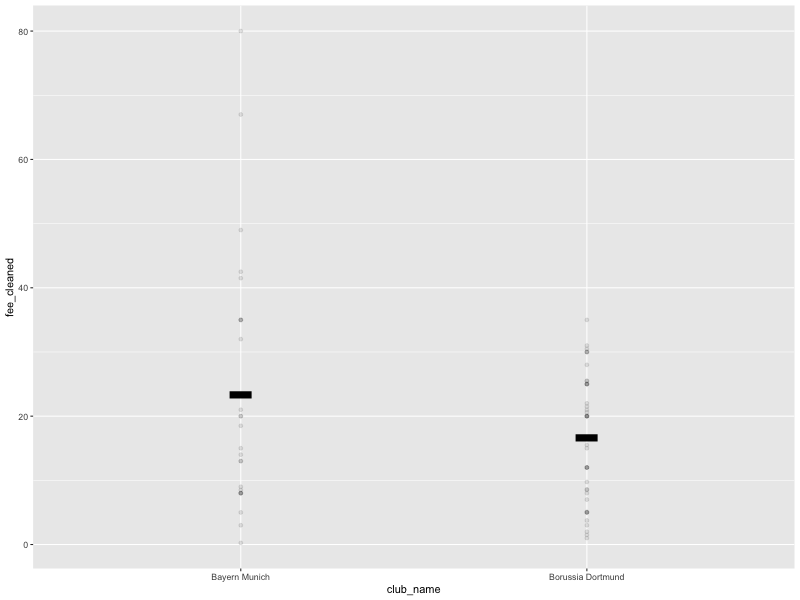

In [7]:
%%R -i df -w 800 -h 600

ggplot(df, aes(y=fee_cleaned, x=club_name))+
    geom_point(alpha=0.1) +
    stat_summary(fun.y=mean,  shape='-', color='black', size=7)  

In [1]:
%%R 

ggplot(df, aes(y=age, x=club_name))+
    geom_point(alpha=0.1) +
    stat_summary(fun.y=mean,  shape='-', color='black', size=7)


UsageError: Cell magic `%%R` not found.


In [ ]:
%%R -i bayern,dortmund

#Author DataFlair
t.test(bayern$age, dortmund$age, var.equal = FALSE)


In [9]:
#give me the unique clubs in the premier league
df.club_name.unique()

array(['Club Atlético Aldosivi', 'Sanfrecce Hiroshima', 'Sagan Tosu',
       'Oita Trinita', 'Hokkaido Consadole Sapporo', 'Vissel Kobe',
       'Shonan Bellmare', 'Shimizu S-Pulse', 'Nagoya Grampus',
       'Gamba Osaka', 'Cerezo Osaka', 'Vegalta Sendai',
       'Kawasaki Frontale', 'Yokohama F. Marinos', 'Yokohama FC',
       'FC Tokyo', 'Kashima Antlers', 'Urawa Red Diamonds',
       'Kashiwa Reysol', 'Júbilo Iwata', 'Matsumoto Yamaga',
       'Avispa Fukuoka', 'Kyoto Sanga', 'Albirex Niigata',
       'Tokushima Vortis', 'Henan Songshan Longmen',
       'Cangzhou Mighty Lions', 'Tianjin Jinmen Tiger', 'Wuhan Yangtze',
       'Guangzhou City', 'Wuhan Three Towns', 'Meizhou Hakka',
       'Chengdu Rongcheng', 'Dalian Professional', 'Shandong Taishan',
       'Shanghai Port', 'Guangzhou FC', 'Changchun Yatai',
       'Beijing Guoan', 'Shenzhen FC', 'Zhejiang FC', 'Hebei FC',
       'Qingdao FC', 'Shanghai Shenhua', 'Wuhan FC',
       'Chongqing Liangjiang Athletic', 'V-Varen Nagasaki',

In [11]:
%%R -i df

df <- read_csv('data.csv')
to_model <- df %>%  filter(year > 2010) %>% filter(club_involved_name %in% c('Bayern Munich', 'Borussia Dortmund', 'Liverpool FC', 'Manchester United'))

model <- lm(fee_cleaned ~ age + club_involved_name, data=to_model)
summary(model)

Rows: 61529 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): club_name, player_name, position, club_involved_name, fee, transfe...
dbl  (3): age, fee_cleaned, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Call:
lm(formula = fee_cleaned ~ age + club_involved_name, data = to_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.136 -10.090  -5.231   2.974 123.857 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                          24.9345    10.0880   2.472   0.0145 *
age                                  -0.6061     0.3747  -1.618   0.1076  
club_involved_nameBorussia Dortmund   5.9184     4.2414   1.395   0.1648  
club_involved_nameLiverpool FC        1.3617     4.4441   0.306   0.7597  
club_involved_nameManchester United  -1.2783     4.

In [6]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Club Atlético Aldosivi,Alan Alegre,25.0,Centre-Back,Quilmes Atlético Club,free transfer,in,Summer,0.0,Superliga,2016,2016/2017,Argentina
32432,Sanfrecce Hiroshima,Ryo Nagai,28.0,Centre-Forward,Matsumoto Yamaga,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32433,Sanfrecce Hiroshima,Kazuki Kushibiki,26.0,Centre-Back,Nagoya Grampus,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32446,Sagan Tosu,Ryoya Morishita,22.0,Right-Back,Meiji University,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
32447,Sagan Tosu,Yosuke Yuzawa,29.0,Left Winger,Kyoto Sanga,free transfer,in,Winter,0.0,J1 League,2019,2019/2020,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61521,Torpedo Moscow,Jajá,21.0,Right Winger,Club Athletico Paranaense,loan transfer,in,Winter,NaN,Premier Liga,2022,2022/2023,Russia
61523,Fakel Voronezh,Vyacheslav Yakimov,24.0,Defensive Midfield,FK Krasnodar,loan transfer,in,Winter,NaN,Premier Liga,2022,2022/2023,Russia
61524,Fakel Voronezh,Réda Rabeï,28.0,Central Midfield,Botev Plovdiv,loan transfer,in,Winter,NaN,Premier Liga,2022,2022/2023,Russia
61525,Fakel Voronezh,Mohamed Brahimi,24.0,Left Winger,Botev Plovdiv,loan transfer,in,Winter,NaN,Premier Liga,2022,2022/2023,Russia


## Clearly Dortmund buys players for cheaper and goes for younger ones.

In [ ]:
%%R -i dortmund -w 800 -h 600

ggplot(dortmund, aes(x=age, y=fee_cleaned))+
    geom_point()

In [ ]:
%%R -i bayern -w 800 -h 600

ggplot(bayern, aes(x=age, y=fee_cleaned))+
    geom_point()

In [ ]:
%%R -i df_young

res <- t.test(fee_cleaned~age, data=df_young)